# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who:

Audience: Private Equity firms, investors, financial analysts.
Stakeholders: PE firms, company management, employees, analysts.


What:

Focus: Scoring companies on acquisition readiness based on financial (quantitative) and cultural (qualitative) factors.
Key Metrics: Company size, employee satisfaction, ratings, reviews, industry type.

Goal: Identify key factors influencing acquisition readiness and balance financial vs. cultural metrics.


How:

Analysis:
EDA to find patterns in company metrics and reviews.
Scoring model that combines financial and cultural data.
Sentiment analysis of reviews to assess company culture.
Clustering by industry type and company size.

Visualization: Use charts (bar, scatter, heatmap) and dashboards to present findings clearly.


# 3. Homework - work with your own data

In [28]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [9]:
import os
print(os.listdir())

['Week8.ipynb', 'Week12.ipynb', 'Week10.ipynb', 'Week11.ipynb', 'Week5-concealed-answer.ipynb', 'Week13.ipynb', 'Week1.ipynb', 'Week4.ipynb', 'Week6.ipynb', 'Week3.ipynb', 'Week14.ipynb', 'glassdoor_company.csv', 'Week2.ipynb', 'Week7.ipynb', 'bank_customers.csv', 'Week9.ipynb']


In [11]:
# Load the glassdoor_company.csv into a DataFrame
df_glassdoor = pd.read_csv('glassdoor_company.csv', encoding='ISO-8859-1')


In [12]:
# Check the first few rows to ensure it loaded correctly
df_glassdoor.head()

,Company Name,Company rating,Company reviews,Company salaries,Company Jobs,Location,Number of Employees,Industry Type,Company Description
0,Amazon,3.8,168.8K,201.7K,201.7K,25 office locations in United States,10000+ Employees,Internet & Web Services,"All Amazon teams and businesses, from Prime de..."
1,Deloitte,4.1,97.2K,167.4K,167.4K,23 office locations in United States,10000+ Employees,Accounting & Tax,Think a professional services career is nothin...
2,Target,3.6,75K,116.1K,116.1K,4 office locations in United States,10000+ Employees,General Merchandise & Superstores,Target is one of the worlds most recognized b...
3,McDonald's,3.5,117K,71.7K,71.7K,110 N Carpenter Street,10000+ Employees,Restaurants & Cafes,McDonalds is proud to be one of the most reco...
4,Accenture,4.0,145.1K,53.6K,53.6K,United States,10000+ Employees,Business Consulting,Accenture is a global professional services co...


Step 1: Summarize the Dataset

In [13]:
# Summarize the dataset
df_glassdoor.info()

# Basic statistical summary
df_glassdoor.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         9939 non-null   object 
 1   Company rating       9940 non-null   float64
 2   Company reviews      9940 non-null   object 
 3   Company salaries     9940 non-null   object 
 4   Company Jobs         9940 non-null   object 
 5   Location             9940 non-null   object 
 6   Number of Employees  9940 non-null   object 
 7   Industry Type        9760 non-null   object 
 8   Company Description  8687 non-null   object 
dtypes: float64(1), object(8)
memory usage: 699.0+ KB


,Company rating
count,9940.000000
mean,3.896016
std,0.285914
min,3.500000
25%,3.700000
50%,3.900000
75%,4.100000
max,5.000000


Step 2: Check for Duplicate Rows

In [14]:
# Check for duplicate rows
duplicate_rows = df_glassdoor[df_glassdoor.duplicated()]
duplicate_rows

,Company Name,Company rating,Company reviews,Company salaries,Company Jobs,Location,Number of Employees,Industry Type,Company Description
9762,Jumia,3.6,1.3K,30,30,United States,1001 to 5000 Employees,Internet & Web Services,Jumia is the leading pan-African e-commerce pl...
9763,Honey,4.5,87,161,161,4 office locations in United States,201 to 500 Employees,Internet & Web Services,"Founded in 2012 and headquartered in Downtown,..."
9764,Farm Fresh Supermarkets,3.6,184,212,212,United States,1001 to 5000 Employees,Grocery Stores,Some say the only thing better than Farm Fresh...
9766,Vibracoustic,3.8,199,106,106,8 office locations in United States,10000+ Employees,Transportation Equipment Manufacturing,Vibracoustic is a leading global automotive NV...
9800,Tecan,3.6,148,179,179,2 office locations in United States,1001 to 5000 Employees,Biotech & Pharmaceuticals,At Tecan (www.tecan.com) we help to improve pe...
9801,Salem State University,3.6,147,238,238,United States,1001 to 5000 Employees,Colleges & Universities,"Salem State University, located just 15 miles ..."
9802,College of the Holy Cross,4.2,161,250,250,United States,501 to 1000 Employees,Colleges & Universities,College of The Holy Cross has some real Crusad...


In [15]:
# Drop duplicate rows
df_glassdoor = df_glassdoor.drop_duplicates()

Step 3: Check for Duplicate Values in a Given Column


In [16]:
# Check for duplicate company names
duplicate_companies = df_glassdoor['Company Name'].duplicated().sum()
duplicate_companies

np.int64(56)

Step 4: Clean and Convert Columns to Numeric Format

In [20]:
# Check the data types to see if 'Company reviews' is indeed a string
print(df_glassdoor['Company reviews'].dtype)

# Convert 'Company reviews' to string if needed, then remove 'K' and convert to numeric
df_glassdoor['Company reviews'] = df_glassdoor['Company reviews'].astype(str).str.replace('K', '').astype(float) * 1000

# Perform the same for 'Company salaries' and 'Company Jobs'
df_glassdoor['Company salaries'] = df_glassdoor['Company salaries'].astype(str).str.replace('K', '').astype(float) * 1000
df_glassdoor['Company Jobs'] = df_glassdoor['Company Jobs'].astype(str).str.replace('K', '').astype(float) * 1000



float64


Step 5: Check for Missing or Null Values

In [21]:
# Check for missing values
missing_values = df_glassdoor.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Company Name              1
Company rating            0
Company reviews           0
Company salaries          0
Company Jobs              0
Location                  0
Number of Employees       0
Industry Type           180
Company Description    1253
dtype: int64


Step 6: Handle Missing Data (If any)

In [22]:
# Fill missing 'Industry Type' and 'Company Description' with 'Unknown'
df_glassdoor['Industry Type'] = df_glassdoor['Industry Type'].fillna('Unknown')
df_glassdoor['Company Description'] = df_glassdoor['Company Description'].fillna('Unknown')

# Fill numeric columns with the mean of the respective column
df_glassdoor['Company reviews'] = df_glassdoor['Company reviews'].fillna(df_glassdoor['Company reviews'].mean())
df_glassdoor['Company salaries'] = df_glassdoor['Company salaries'].fillna(df_glassdoor['Company salaries'].mean())
df_glassdoor['Company Jobs'] = df_glassdoor['Company Jobs'].fillna(df_glassdoor['Company Jobs'].mean())

Step 7: Summarize the Dataset

In [23]:
# Get basic info about the dataset
df_glassdoor.info()

# Get descriptive statistics for numerical columns
df_glassdoor.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 9933 entries, 0 to 9939
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Name         9932 non-null   object 
 1   Company rating       9933 non-null   float64
 2   Company reviews      9933 non-null   float64
 3   Company salaries     9933 non-null   float64
 4   Company Jobs         9933 non-null   float64
 5   Location             9933 non-null   object 
 6   Number of Employees  9933 non-null   object 
 7   Industry Type        9933 non-null   object 
 8   Company Description  9933 non-null   object 
dtypes: float64(4), object(5)
memory usage: 776.0+ KB


,Company rating,Company reviews,Company salaries,Company Jobs
count,9933.000000,9.933000e+03,9.933000e+03,9.933000e+03
mean,3.896054,2.701550e+11,2.928357e+11,2.928357e+08
std,0.285871,2.407666e+11,2.513917e+11,2.513917e+08
min,3.500000,1.000000e+09,1.000000e+09,1.000000e+06
25%,3.700000,9.200000e+10,6.800000e+10,6.800000e+07
50%,3.900000,2.150000e+11,2.540000e+11,2.540000e+08
75%,4.100000,3.950000e+11,4.320000e+11,4.320000e+08
max,5.000000,9.980000e+11,9.990000e+11,9.990000e+08


Step 8: Check for Duplicates

In [24]:
# Check for duplicates
duplicates = df_glassdoor.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df_glassdoor = df_glassdoor.drop_duplicates()

Number of duplicate rows: 0


Step 9: Explore Categorical Data and Apply One-Hot Encoding (If Necessary)

In [25]:
# Apply one-hot encoding to categorical columns (e.g., Industry Type, Location)
df_glassdoor_encoded = pd.get_dummies(df_glassdoor, columns=['Industry Type', 'Location'], drop_first=True)

# Check the new dataframe with one-hot encoded columns
df_glassdoor_encoded.head()

,Company Name,Company rating,Company reviews,Company salaries,Company Jobs,Number of Employees,Company Description,Industry Type_Advertising & Public Relations,Industry Type_Aerospace & Defense,"Industry Type_Airlines, Airports & Air Transportation",...,"Location_Seven Tower Bridge, Suite 1300","Location_Suite 110, 633 Battery Street","Location_U S Senate Washington, District of Columbia, 20510-0001, United States",Location_United States,"Location_Virginia Beach, VA","Location_We Work, Wells Fargo, 1700 Lincoln Street",Location_WeWork 450 Park Avenue South 3rd Floor,"Location_WeWork, 6th Floor, 135 Madison Ave",Location_Willis Tower 233 South Wacker Drive Suite 4300,"Location_d.b.a. Omega Healthcare Management Services, 2424 North Federal Highway, Suite #205, Boca Raton, FL 33431 info@omegahms.com"
0,Amazon,3.8,1.688000e+11,2.017000e+11,201700000.0,10000+ Employees,"All Amazon teams and businesses, from Prime de...",False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Deloitte,4.1,9.720000e+10,1.674000e+11,167400000.0,10000+ Employees,Think a professional services career is nothin...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Target,3.6,7.500000e+10,1.161000e+11,116100000.0,10000+ Employees,Target is one of the worlds most recognized b...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,McDonald's,3.5,1.170000e+11,7.170000e+10,71700000.0,10000+ Employees,McDonalds is proud to be one of the most reco...,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Accenture,4.0,1.451000e+11,5.360000e+10,53600000.0,10000+ Employees,Accenture is a global professional services co...,False,False,False,...,False,False,False,True,False,False,False,False,False,False


# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

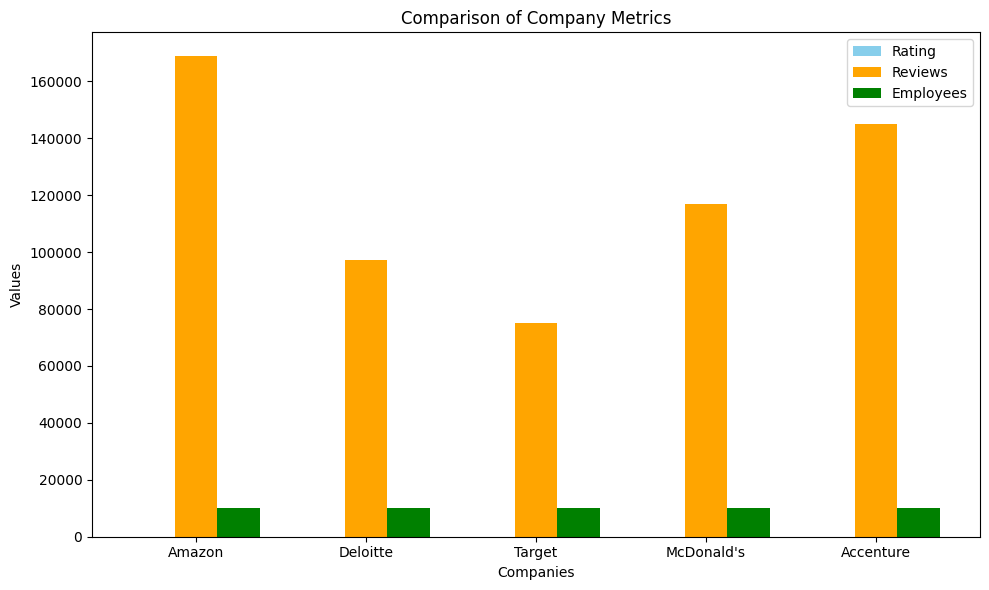

In [33]:
# Sample data
companies = ["Amazon", "Deloitte", "Target", "McDonald's", "Accenture"]
ratings = [3.8, 4.1, 3.6, 3.5, 4.0]  # Company ratings
reviews = [168800, 97200, 75000, 117000, 145100]  # Company reviews (in thousands)
employees = [10000, 10000, 10000, 10000, 10000]  # Number of employees (just a constant for simplicity)

# Set the positions of the bars on the X-axis
x = range(len(companies))

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
bar_width = 0.25  # Width of the bars
ax.bar(x, ratings, width=bar_width, label='Rating', color='skyblue')
ax.bar([i + bar_width for i in x], reviews, width=bar_width, label='Reviews', color='orange')
ax.bar([i + bar_width*2 for i in x], employees, width=bar_width, label='Employees', color='green')

# Set labels and title
ax.set_xlabel('Companies')
ax.set_ylabel('Values')
ax.set_title('Comparison of Company Metrics')
ax.set_xticks([i + bar_width for i in x])  # Positioning the X labels between the bars
ax.set_xticklabels(companies)

# Adding a legend
ax.legend()

# Display the plot
plt.tight_layout()